In [1]:
from sqlalchemy.orm import relationship, sessionmaker
from sqlalchemy import create_engine
from database import Reactions

engine = create_engine('sqlite:///reactions2.db', echo = False)

Session = sessionmaker(bind=engine)
session = Session()

2023-06-19 19:40:11,635 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-19 19:40:11,636 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("reactions")
2023-06-19 19:40:11,636 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-19 19:40:11,637 INFO sqlalchemy.engine.Engine COMMIT


In [81]:
r = session.query(Reactions).all()


solvs = {}
ele = {}
nucleophile = {}
catalyst = {}
base = {}
for k in r:
    if "Suzuki" not in k.reaction_name:
        continue
    if k.solvent not in solvs:
        solvs[k.solvent] = []
    if k.electrophile not in ele:
        ele[k.electrophile] = []
    # if k.output_value > 175:
        # continue
    solvs[k.solvent].append(float(k.output_value))

In [83]:
print(len(solvs))
print(len(ele))

8
17


In [77]:
def plot_boxplots(dictionary):
    fig, ax = plt.subplots()
    data = list(dictionary.values())
    labels = list(dictionary.keys())

    ax.boxplot(data, vert=False)
    ax.set_yticklabels(labels, fontsize=6, fontfamily="arial")
    ax.set_xticklabels([0,20,40,60,80,100,120,140,160], fontsize=6, fontfamily="arial")
    ax.set_xlabel('prod/is', fontsize=6, fontfamily="arial")
    ax.set_ylabel('solvent', fontsize=6, fontfamily="arial")
    ax.set_title('boxplot for each solvent', fontsize=6, fontfamily="arial")
    ax.set_xlim([0,175])
    plt.savefig("boxplots_solvents.png", dpi=300)

In [78]:
def sort_dict_by_key(dictionary):
    sorted_dict = dict(sorted(dictionary.items()))
    return sorted_dict

In [79]:
for k in solvs:
    print(k, len(solvs[k]))

25%H2O_NMP 436
25%H2O_DMSO 588
25%H2O_DMF 76
NMP 210
10%tAmOH_NMP 192
DMSO 786
DMF 18
25%tAmOH_DMSO 480


/var/folders/8k/w__0g4xs7rj0xv7hk3dqm71w0000gn/T/ipykernel_26660/1926821813.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,20,40,60,80,100,120,140,160], fontsize=6, fontfamily="arial")


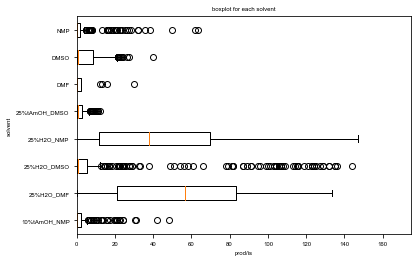

In [80]:
import matplotlib.pyplot as plt
plot_boxplots(sort_dict_by_key(solvs))